# Chest X-Ray Images (Pneumonia)
- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia



- Beating everything with Depthwise Convolution 필사 
- https://www.kaggle.com/code/aakashnain/beating-everything-with-depthwise-convolution

- 데이터 세트는 3개의 폴더(train, test, val)로 구성되어 있으며 각 이미지 카테고리(폐렴/정상)에 대한 하위 폴더가 포함되어 있습니다. 
- 5,863개의 엑스레이 이미지(JPEG)와 2개의 카테고리(폐렴/정상)가 있습니다.


- 흉부 엑스레이 이미지(전방-후방)는 광저우 광저우 여성 및 아동 의료 센터의 1~5세 소아 환자 후향적 코호트에서 선택되었습니다. 
- 모든 흉부 엑스레이 이미징은 환자의 일상적인 임상 치료의 일부로 수행되었습니다.


- 흉부 엑스레이 이미지 분석을 위해 처음에는 품질이 낮거나 판독이 불가능한 스캔을 모두 제거하여 품질 관리를 위해 모든 흉부 방사선 사진을 선별했습니다. 
- 그런 다음 두 명의 전문 의사가 이미지에 대한 진단 등급을 매긴 후 AI 시스템 학습에 사용할 수 있도록 승인했습니다. 
- 등급 오류를 고려하기 위해 세 번째 전문가가 평가 세트도 확인했습니다.

# 데이터 확인

## 라이브러리

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import os
# import glob
# import h5py
# import shutil
# import imgaug as aug
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.im#age as mimg
# import imgaug.augmenters as iaa
# from os import listdir, makedirs, getcwd, remove
# from os.path import isfile, join, abspath, exists, isdir, expanduser
# from PIL import Image
# from pathlib import Path
# from skimage.io import imread
# from skimage.transform import resize
# from keras.models import Sequential, Model
# from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
# from keras.layers import GlobalMaxPooling2D
# from keras.layers.normalization import BatchNormalization
# from keras.layers.merge import Concatenate
# from keras.models import Model
# from keras.optimizers import Adam, SGD, RMSprop
# from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
# from keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from mlxtend.plotting import plot_confusion_matrix
# from sklearn.metrics import confusion_matrix
# import cv2
# from keras import backend as K
# color = sns.color_palette()
# %matplotlib inline

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# print(os.listdir("../input"))

# # Any results you write to the current directory are saved as output.

## 데이터 불러오기

In [1]:
!unzip -qq 'archive (4).zip'

replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
import os
print(os.listdir("chest_xray"))

['train', 'val', 'chest_xray', 'test', '__MACOSX']


In [5]:
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

In [2]:
# !pip install tensorflow

In [38]:
# !pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable


- 심층 학습을 할 때 재현성은 큰 관심사입니다. 
- 이와 관련하여 KaggleNobs 슬랙에 대한 좋은 논의가 있었습니다. 
- 결과가 거의 재현 가능하도록 여러 가지를 설정할 것입니다(완전하지는 않더라도).

In [6]:
import numpy as np
import tensorflow as tf
# from tensorflow import keras
from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


# python에서 해시 기반 작업의 시드 설정
os.environ['PYTHONHASHSEED'] = '0'

In [3]:
# !pip install imgaug

In [9]:
import imgaug as aug

# Set the numpy seed
np.random.seed(111)

# tensorflow에서 멀티 스레드 사용 안 함
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)

# Set the TensorFlow random seed
tf.random.set_seed(111)

# Start a TensorFlow session
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)

# Set the session in keras
K.set_session(sess)

# Make the augmentation sequence deterministic
aug.seed=(111)

2023-04-19 03:12:45.269931: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-19 03:12:46.114107: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2639 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:3f:00.0, compute capability: 7.5


## data set


In [10]:
#

from pathlib import Path
data_dir = Path('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

In [11]:
data_dir

PosixPath('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray')

In [12]:
train_dir

PosixPath('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray/train')

## train dataset

* NORMAL: 정상적인 (폐렴이 없는) 경우를 설명하는 샘플들
* PNEUMONIA: 폐렴 환자인 검체가 들어 있는 샘플들

In [13]:
import pandas as pd
import glob
# normal 경로, pneumonia 경로 불러오기 
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# 모든 이미지 불러오기
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

train_data = []

# train_data에 normal_case 추가
for img in normal_cases:
    train_data.append((img,0))
    
# train_data에 pneumonia_case 추가
for img in pneumonia_cases:
    train_data.append((img, 1))
    
# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

train_data.head()


,image,label
0,../Chest X-Ray Images (Pneumonia)/chest_xray/c...,0
1,../Chest X-Ray Images (Pneumonia)/chest_xray/c...,0
2,../Chest X-Ray Images (Pneumonia)/chest_xray/c...,1
3,../Chest X-Ray Images (Pneumonia)/chest_xray/c...,1
4,../Chest X-Ray Images (Pneumonia)/chest_xray/c...,1


## 데이터 분포 확인 

In [14]:
# count 확인
cases_count = train_data['label'].value_counts()
print(cases_count)

1    3875
0    1341
Name: label, dtype: int64


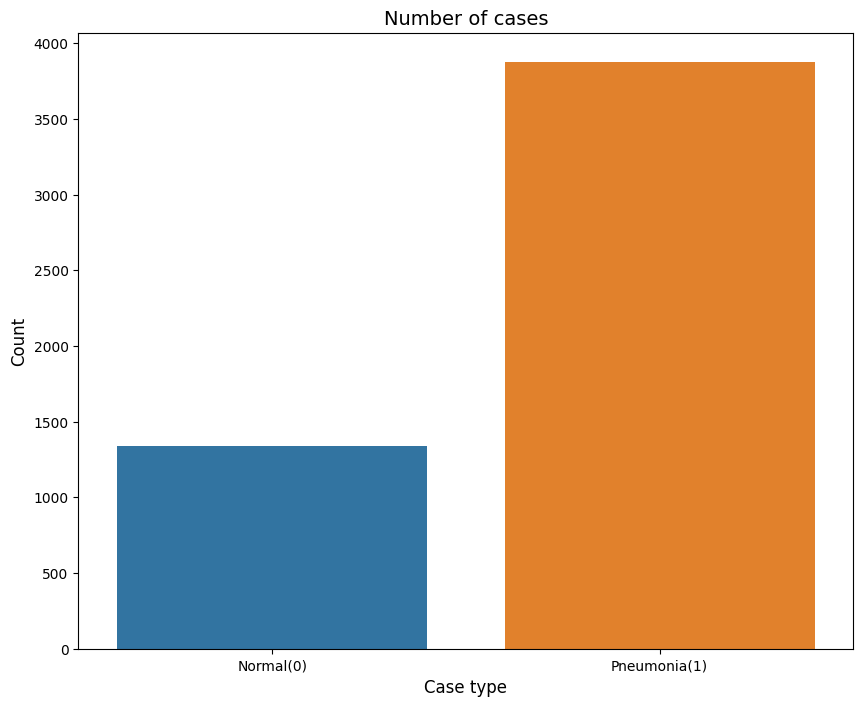

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)','Pneumonia(1)'])
plt.show() # 해 주면 ;랑 같음 

* 데이터의 불균형이 매우 큼
* 우리는 일반적인 사례와 비교하여 거의 3배의 폐렴 사례를 가지고 있습니다. 

* 정상적인 사례가 너무 많거나 질병과 관련된 사례가 너무 많을 것입니다.

* 일반적인 경우와 폐렴의 경우가 어떻게 다른지 알아보겠습니다. 


## train data 살펴보기

In [28]:
# 일부 데이터 가져오기

pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

pneumonia_samples

[PosixPath('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray/train/PNEUMONIA/person278_bacteria_1309.jpeg'),
 PosixPath('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray/train/PNEUMONIA/person961_bacteria_2886.jpeg'),
 PosixPath('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray/train/PNEUMONIA/person1657_bacteria_4398.jpeg'),
 PosixPath('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray/train/PNEUMONIA/person469_bacteria_1995.jpeg'),
 PosixPath('../Chest X-Ray Images (Pneumonia)/chest_xray/chest_xray/train/PNEUMONIA/person591_virus_1139.jpeg')]

In [29]:
# 단일 목록에서 데이터를 일치시키고 위의 두 목록을 삭제
samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

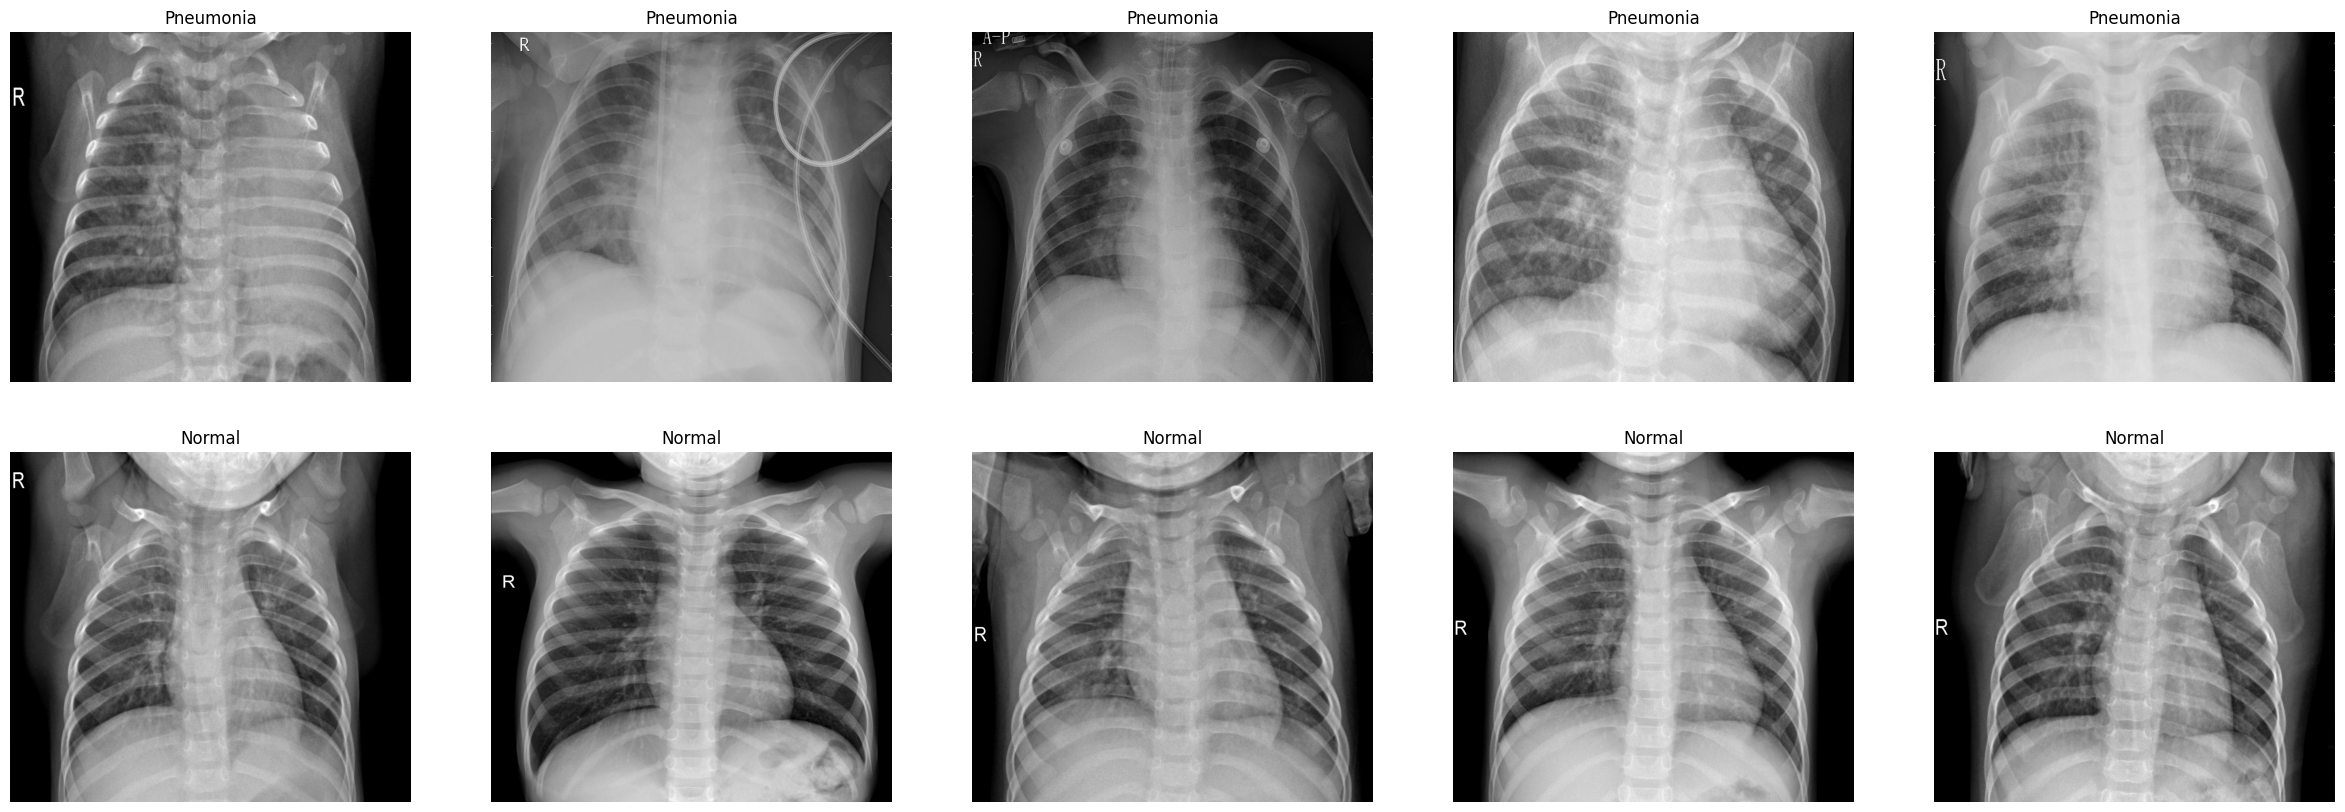

In [33]:
# Plot the data
from skimage.io import imread

f, ax = plt.subplots(2, 5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

- 잘 보면 육안으로는 정상적인 경우와 폐렴을 구분하지 못하는 경우가 있습니다. 
- 위 플롯에 하나의 경우가 있는데, 알아보기 힘듭니다.
- 강력한 분류기를 만들 수 있다면 의사에게도 큰 도움이 될 것입니다.

## Preparing validation data
- 교육 데이터 세트에 대한 생성기를 노트북 후반부에 정의할 예정이지만 검증 데이터가 작기 때문에 이미지를 읽고 생성기 없이 데이터를 로드할 수 있습니다. 

In [69]:
# normal 경로, pneumonia 경로 불러오기 
normal_cases_dir = val_dir / 'NORMAL'
pneumonia_cases_dir = val_dir / 'PNEUMONIA'

# 모든 이미지 불러오기
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

In [70]:
# 일부 영상은 그레이스케일로 표시되지만 대부분 3개의 채널이 포함되어 있습니다. 
# 따라서 이미지가 그레이스케일이면 3채널의 이미지로 변환합니다.
# 픽셀 값을 정규화하고 모든 이미지의 크기를 224x224로 조정합니다.

import cv2
from keras.utils import to_categorical

valid_data = []
valid_labels = []

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2]==1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Pneumonia cases
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2]==1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)

In [71]:
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print("Total number of validation examples: ", valid_data.shape)
print("Total number of labels:", valid_labels.shape)

Total number of validation examples:  (16, 224, 224, 3)
Total number of labels: (16, 2)


## 증강
- 전체 분포의 균형을 맞추기 위해 표본이 부족한 클래스의 다른 표본을 생성할 수 있습니다.

- imgaug는 깔끔한 api와 함께 제공되며 엄청난 증강을 할 수 있습니다. 
- 각 반복에서 세 가지 중 하나의 증강 기법을 사용하여 샘플에 적용합니다.

In [72]:
# 증강 sequence

import imgaug.augmenters as iaa

seq = iaa.OneOf([ # 지정된 augmentation 중 하나를 무작위로 선택 
    iaa.Fliplr(), # horizontal flips 좌우반전 
    iaa.Affine(rotate=20), # roatation 회전 
    iaa.Multiply((1.2, 1.5)) # random brightness
])


## Training data generator
- 여기서는 매우 간단한 데이터 생성기를 정의하겠습니다.

In [73]:
def data_gen(data, batch_size):
    # Get total number of samples in the data
    n = len(data)
    steps = n//batch_size
    
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size,2), dtype=np.float32)

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Initialize a counter
    i =0
    while True:
        np.random.shuffle(indices)
        # Get the next batch 
        count = 0
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            img_name = data.iloc[idx]['image']
            label = data.iloc[idx]['label']
            
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
            
            # generating more samples of the undersampled class
            if label==0 and count < batch_size-2:
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2
            
            else:
                count+=1
            
            if count==batch_size-1:
                break
            
        i+=1
        yield batch_data, batch_labels
            
        if i>=steps:
            i=0

### 모델  
- 부분적인 전이 학습을 하고 나머지 모델은 처음부터 다시 학습
- 제한된 데이터로 딥러닝 모델을 처음부터 구축하는 모범 사례 중 하나를 공유

1. 간단한 아키텍처를 선택
2. 이미지넷에서 사전 학습된 네트워크에서 처음 몇 개의 레이어를 초기화
    - 처음 몇 개의 레이어는 색상 얼룩, 패치, 가장자리 등과 같은 일반적인 세부 사항을 캡처하기 때문
    - 이러한 레이어의 가중치를 무작위로 초기화하는 대신 미세 조정하는 것이 훨씬 더 좋습니다. 
3. 더 적은 수의 매개 변수를 도입하는 레이어를 선택 
    - 예를 들어 Depthwise SeparableConv는 Conv 레이어를 대체할 수 있는 좋은 레이어
    - 일반 컨볼루션에 비해 더 적은 수의 파라미터를 도입하고 각 채널에 다른 필터를 적용하므로 더 많은 정보를 캡처할 수 있음
    - 강력한 네트워크인 Xception은 이러한 레이어 위에만 구축됨
    - 이 백서에서 Xception과 심층적으로 분리 가능한 컨볼루션에 대해 자세히 알아볼 수 있습니다. 
4. convolutions과 함께 batch norm을 사용
    - 네트워크가 더 깊어지면 batch norm이 중요한 역할을 하기 시작합니다. 
5. 적절한 수의 뉴런으로 조밀한 레이어를 추가합니다. 
    - 더 높은 학습률로 훈련하고 밀도가 높은 레이어의 뉴런 수를 실험합니다. 
6. 좋은 깊이를 알게 되면, 더 낮은 학습률로 네트워크를 훈련

In [74]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers.normalization import BatchNormalization


def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)
    
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)
    
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
    x = BatchNormalization(name='bn3')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
    x = BatchNormalization(name='bn4')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
    x = MaxPooling2D((2,2), name='pool4')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout1')(x)
    x = Dense(512, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(2, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

ImportError: cannot import name 'BatchNormalization' from 'keras.layers.normalization' (/usr/local/lib/python3.8/dist-packages/keras/layers/normalization/__init__.py)

In [61]:
!pip install --upgrade keras

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.7 MB 13.6 MB/s            
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1+nv22.9 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.12.0 which is incompatible.


In [59]:
model =  build_model()
model.summary()

2023-04-19 10:49:26.655043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2639 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:3f:00.0, compute capability: 7.5


NameError: name 'BatchNormalization' is not defined